In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from vincenty import vincenty # geopy.distance can also be used

In [2]:
# import pour afficher les cartes
from plotly.offline import iplot, init_notebook_mode
import colorlover as cl
import plotly.express as px
import plotly.graph_objects as go

# init
init_notebook_mode(connected=True)

In [3]:
# load train and test data
df_mess_train = pd.read_csv('mess_train_list.csv')
df_mess_test = pd.read_csv('mess_test_list.csv')
pos_train = pd.read_csv('pos_train_list.csv')

In [4]:
df_mess_train.head()

messid  bsid       did  nseq   rssi       time_ux  \
0  573bf1d9864fce1a9af8c5c9  2841  473335.0   0.5 -121.5  1.463546e+12   
1  573bf1d9864fce1a9af8c5c9  3526  473335.0   2.0 -125.0  1.463546e+12   
2  573bf3533e952e19126b256a  2605  473335.0   1.0 -134.0  1.463547e+12   
3  573c0cd0f0fe6e735a699b93  2610  473953.0   2.0 -132.0  1.463553e+12   
4  573c0cd0f0fe6e735a699b93  3574  473953.0   1.0 -120.0  1.463553e+12   

      bs_lat      bs_lng  
0  39.617794 -104.954917  
1  39.677251 -104.952721  
2  39.612745 -105.008827  
3  39.797969 -105.073460  
4  39.723151 -104.956216

In [5]:
df_mess_train.describe()

bsid           did          nseq          rssi       time_ux  \
count  39250.000000  3.925000e+04  39250.000000  39250.000000  3.925000e+04   
mean    4533.774752  4.835932e+05      1.043541   -125.863580  1.473368e+12   
std     2570.495638  9.893140e+04      0.563540      9.226500  5.506910e+09   
min      879.000000  4.732880e+05      0.000000   -155.000000  1.463546e+12   
25%     2790.000000  4.761230e+05      1.000000   -132.500000  1.468410e+12   
50%     3559.000000  4.763150e+05      1.000000   -127.333333  1.473444e+12   
75%     7456.000000  4.766090e+05      1.500000   -121.000000  1.479118e+12   
max    11951.000000  1.747448e+06      2.000000    -64.000000  1.481143e+12   

             bs_lat        bs_lng  
count  39250.000000  39250.000000  
mean      42.554998   -100.969685  
std        7.722787     11.522732  
min       36.053394   -107.463146  
25%       39.747448   -105.074287  
50%       39.793585   -105.043685  
75%       39.838740   -104.998429  
max       64.300000    -68.500000

In [6]:
pos_train.head()

lat         lng
0  39.606690 -104.958490
1  39.606690 -104.958490
2  39.637741 -104.958554
3  39.730417 -104.968940
4  39.730417 -104.968940

In [7]:
pos_train.describe()

lat           lng
count  39250.000000  39250.000000
mean      39.783333   -105.056343
std        0.206262      0.162954
min       35.770683   -107.630679
25%       39.708599   -105.060463
50%       39.776882   -105.039440
75%       39.805279   -105.018730
max       43.140387   -102.094289

In [8]:
df_mess_test.head()

messid  bsid       did  nseq   rssi       time_ux  \
0  573be2503e952e191262c351  3578  116539.0   2.0 -111.0  1.463542e+12   
1  573c05f83e952e1912758013  2617  472504.0   0.0 -136.0  1.463551e+12   
2  573c05f83e952e1912758013  3556  472504.0   0.0 -127.0  1.463551e+12   
3  573c05f83e952e1912758013  3578  472504.0   0.0 -129.0  1.463551e+12   
4  573c05f83e952e1912758013  4058  472504.0   0.0 -105.0  1.463551e+12   

      bs_lat      bs_lng  
0  39.728651 -105.163032  
1  39.779908 -105.062479  
2  39.780658 -105.053676  
3  39.728651 -105.163032  
4  39.783211 -105.088747

In [9]:
df_mess_train['lat'] = pos_train['lat']
df_mess_train['lng'] = pos_train['lng']

In [11]:
# plot des devices
fig = px.scatter_mapbox(pos_train, lat='lat', lon='lng')

fig.update_layout(mapbox_style="stamen-terrain", mapbox_zoom=8, 
    margin={"r":0,"t":0,"l":0,"b":0})#,height=800)
# fig.update_layout(mapbox_style="open-street-map", mapbox_zoom=6, 
#     margin={"r":0,"t":0,"l":0,"b":0})

fig.show()

In [12]:
# plot des stations
fig = px.scatter_mapbox(df_mess_train, lat='bs_lat', lon='bs_lng')

fig.update_layout(mapbox_style="stamen-terrain", mapbox_zoom=5, 
    margin={"r":0,"t":0,"l":0,"b":0})
# fig.update_layout(mapbox_style="open-street-map", mapbox_zoom=6, 
#     margin={"r":0,"t":0,"l":0,"b":0})

fig.show()

In [14]:
def vincenty_vec(vec_coord):
    vin_vec_dist = np.zeros(vec_coord.shape[0])
    if vec_coord.shape[1] !=  4:
        print('ERROR: Bad number of columns (shall be = 4)')
    else:
        vin_vec_dist = [vincenty(vec_coord[m,0:2],vec_coord[m,2:]) for m in range(vec_coord.shape[0])]
    return vin_vec_dist

In [15]:
# evaluate distance error for each predicted point
def Eval_geoloc(y_train_lat , y_train_lng, y_pred_lat, y_pred_lng):
    vec_coord = np.array([y_train_lat , y_train_lng, y_pred_lat, y_pred_lng])
    err_vec = vincenty_vec(np.transpose(vec_coord))
    
    return err_vec

In [16]:
# on rajoute distance device-station dans df_mess_train
df_mess_train['d_base'] = Eval_geoloc(df_mess_train['bs_lat'],df_mess_train['bs_lng'],pos_train['lat'],pos_train['lng'])

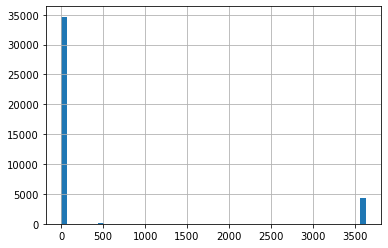

In [17]:
df_mess_train['d_base'].hist(bins=50);

In [18]:
df_mess_train_filter = df_mess_train.loc[df_mess_train['d_base'] < 3000,:]

In [19]:
df_mess_train_filter2 = df_mess_train_filter[df_mess_train_filter['d_base'] < 300]

In [50]:
# filtrage final des anomalies du train
df_mess_train_filter3 = df_mess_train_filter2[(df_mess_train_filter2['messid']!= '57aeb41fe541cd77a044cdb8')
                      & (df_mess_train_filter2['d_base'] <= 50)]
df_mess_train_filter3.describe()

bsid           did          nseq          rssi       time_ux  \
count  34579.000000  3.457900e+04  34579.000000  34579.000000  3.457900e+04   
mean    4335.964979  4.817589e+05      1.044651   -125.899192  1.473000e+12   
std     2364.338923  8.630330e+04      0.558705      9.217687  5.577516e+09   
min      879.000000  4.732880e+05      0.000000   -155.000000  1.463546e+12   
25%     2790.000000  4.761850e+05      1.000000   -132.500000  1.467906e+12   
50%     3554.000000  4.763150e+05      1.000000   -127.500000  1.472830e+12   
75%     4790.000000  4.766020e+05      1.500000   -121.000000  1.478673e+12   
max    10148.000000  1.747448e+06      2.000000    -64.000000  1.481143e+12   

             bs_lat        bs_lng           lat           lng        d_base  
count  34579.000000  34579.000000  34579.000000  34579.000000  34579.000000  
mean      39.798268   -105.064546     39.786442   -105.059899      5.572419  
std        0.216214      0.177424      0.216460      0.171193      5.309702  
min       36.053394   -107.463146     35.770683   -107.630679      0.026570  
25%       39.744848   -105.077530     39.708524   -105.063613      2.013047  
50%       39.781464   -105.050984     39.777623   -105.042091      3.983613  
75%       39.816224   -105.010048     39.807485   -105.018761      7.496166  
max       42.850670   -102.011461     43.140387   -102.094289     47.237609

In [51]:
pos_train_filter3 = pos_train.reindex(df_mess_train_filter3.index)

In [52]:
listOfDev = df_mess_train['did'].unique()
len(listOfDev)

113

In [53]:
listOfBs = np.union1d(np.unique(df_mess_train['bsid']), np.unique(df_mess_test['bsid'])) # determine all Base stations that received at least 1 message

In [54]:
len(listOfBs)

259

In [55]:
# Feature Matrix construction 

def feat_mat_const(df_mess_train, listOfBs):

    df_mess_bs_group = df_mess_train.groupby(['messid'], as_index=False) # group data by message (messid)
    nb_mess = len(np.unique(df_mess_train['messid']))
    df_feat = pd.DataFrame(np.zeros((nb_mess,len(listOfBs))), columns = listOfBs) # feature matrix
    idx = 0
    id_list = [0] * nb_mess

    for key, elmt in df_mess_bs_group:
#         df_mess_bs_group.get_group(key)
#         df_feat.loc[idx,df_mess_bs_group.get_group(key)['bsid']] = 1
        df_feat.loc[idx,elmt['bsid']] = 1
        id_list[idx] = key
        idx = idx + 1
    
    return df_feat, id_list # add id value of each message for the correspondance to message  

In [56]:
# Feature Matrix construction 

def feat_mat_const2(df_mess_train, listOfBs):

    df_mess_bs_group = df_mess_train.groupby(['messid'], as_index=False) # group data by message (messid)
    nb_mess = len(np.unique(df_mess_train['messid']))
    df_feat = pd.DataFrame(np.zeros((nb_mess,len(listOfBs))), columns = listOfBs) # feature matrix
    idx = 0
    id_list = [0] * nb_mess

    for key, elmt in df_mess_bs_group:
#         group = df_mess_bs_group.get_group(key)
#         df_feat.loc[idx,group['bsid']] = group['rssi'].values
        df_feat.loc[idx,elmt['bsid']] = elmt['rssi'].values
        id_list[idx] = key
        idx = idx + 1
    
    return df_feat, id_list # add id value of each message for the correspondance to message  

In [57]:
# ground truth construction

def ground_truth_const(df_mess_train, pos_train):

    df_mess_pos = df_mess_train.copy()
    df_mess_pos[['lat', 'lng']] = pos_train

    ground_truth_lat = np.array(df_mess_pos.groupby(['messid']).mean()['lat'])
    ground_truth_lng = np.array(df_mess_pos.groupby(['messid']).mean()['lng'])
    
    return ground_truth_lat, ground_truth_lng

In [58]:
df_feat_filter, id_list_train_filter = feat_mat_const(df_mess_train_filter3, listOfBs)
df_feat_filter.head()

879    911    921    944    980    1012   1086   1092   1120   1131   ...  \
0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  ...   
1    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  ...   
2    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  ...   
3    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  ...   
4    0.0    0.0    0.0    0.0    0.0    0.0    1.0    0.0    0.0    0.0  ...   

   9936   9941   9949   10134  10148  10151  10162  10999  11007  11951  
0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  
1    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  
2    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  
3    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  
4    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  

[5 rows x 259 columns]

In [59]:
df_feat_filter.shape

(5868, 259)

In [60]:
df_feat2_filter, id_list_train2_filter = feat_mat_const2(df_mess_train_filter3, listOfBs)
df_feat2_filter.head()

879    911    921    944    980    1012   1086   1092   1120   1131   ...  \
0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  ...   
1    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  ...   
2    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  ...   
3    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  ...   
4    0.0    0.0    0.0    0.0    0.0    0.0 -141.0    0.0    0.0    0.0  ...   

   9936   9941   9949   10134  10148  10151  10162  10999  11007  11951  
0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  
1    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  
2    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  
3    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  
4    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  

[5 rows x 259 columns]

In [61]:
ground_truth_lat_filter, ground_truth_lng_filter = ground_truth_const(df_mess_train_filter3, pos_train_filter3)
ground_truth_lat_filter.shape

(5868,)

In [62]:
dev_id = df_mess_train_filter3.groupby(['messid'])['did'].first()
dev_id.shape

(5868,)

In [63]:
# Validation

In [64]:
def regressor_and_predict(df_feat, ground_truth_lat, ground_truth_lng, df_test):
    
    # train regressor and make prediction in the train set
    # Input: df_feat: feature matrix used to train regressor
    #        ground_truth_lat: df_feat associated latitude
    #        ground_truth_lng: df_feat associated longitude
    #        df_test: data frame used for prediction
    # Output: y_pred_lat, y_pred_lng

    from sklearn import linear_model

    X_train = np.array(df_feat);
    reg = linear_model.LinearRegression()

    reg.fit(X_train, ground_truth_lat);
    y_pred_lat = reg.predict(df_test) 

    reg.fit(X_train, ground_truth_lng);
    y_pred_lng = reg.predict(df_test) 
    
    return y_pred_lat, y_pred_lng


In [65]:
# Make regressor and prediction using the train set

In [66]:
# Cross validation

In [67]:
from sklearn.model_selection import cross_val_predict, cross_val_score, cross_validate, LeaveOneGroupOut

In [68]:
logo = LeaveOneGroupOut()

In [69]:
from sklearn import linear_model

8.178486


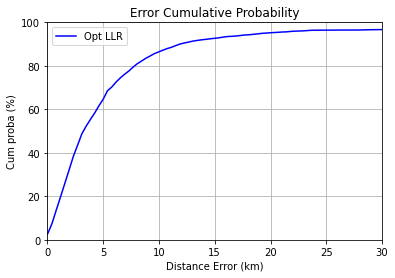

In [70]:
reg = linear_model.LinearRegression()

# Cross validation
y_pred_lng = cross_val_predict(reg, df_feat_filter, ground_truth_lng_filter, cv=10)
y_pred_lat = cross_val_predict(reg, df_feat_filter, ground_truth_lat_filter, cv=10)

err_vec = Eval_geoloc(ground_truth_lat_filter , ground_truth_lng_filter, y_pred_lat, y_pred_lng)

# Plot error distribution

values, base = np.histogram(err_vec, bins=50000)
cumulative = np.cumsum(values)
plt.figure()
plt.plot(base[:-1], cumulative / np.float(np.sum(values))  * 100.0, c='blue')
plt.grid()
plt.xlabel('Distance Error (km)'); plt.ylabel('Cum proba (%)'); plt.axis([0, 30, 0, 100])
plt.title('Error Cumulative Probability'); plt.legend( ["Opt LLR", "LLR 95", "LLR 99"])

# Error criterion
print(np.percentile(err_vec, 80))

In [323]:
# with leave one group out

8.078248000000002


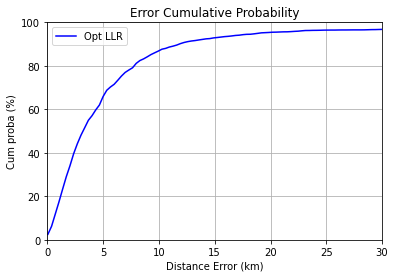

In [71]:
reg = linear_model.LinearRegression()

# Cross validation
y_pred_lng = cross_val_predict(reg, df_feat_filter, ground_truth_lng_filter, cv=logo.get_n_splits(groups=dev_id))
y_pred_lat = cross_val_predict(reg, df_feat_filter, ground_truth_lat_filter, cv=logo.get_n_splits(groups=dev_id))

err_vec = Eval_geoloc(ground_truth_lat_filter , ground_truth_lng_filter, y_pred_lat, y_pred_lng)

# Plot error distribution

values, base = np.histogram(err_vec, bins=50000)
cumulative = np.cumsum(values)
plt.figure()
plt.plot(base[:-1], cumulative / np.float(np.sum(values))  * 100.0, c='blue')
plt.grid()
plt.xlabel('Distance Error (km)'); plt.ylabel('Cum proba (%)'); plt.axis([0, 30, 0, 100])
plt.title('Error Cumulative Probability'); plt.legend( ["Opt LLR", "LLR 95", "LLR 99"])

# Error criterion
print(np.percentile(err_vec, 80))

In [233]:
# with rssi features

8.475564


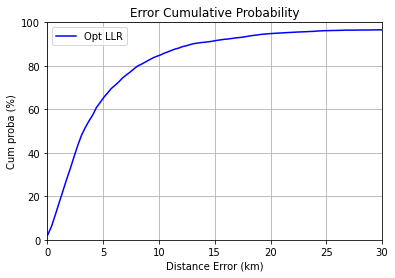

In [72]:
reg = linear_model.LinearRegression()

# Cross validation
y_pred_lng = cross_val_predict(reg, df_feat2_filter, ground_truth_lng_filter, cv=10)
y_pred_lat = cross_val_predict(reg, df_feat2_filter, ground_truth_lat_filter, cv=10)

err_vec = Eval_geoloc(ground_truth_lat_filter , ground_truth_lng_filter, y_pred_lat, y_pred_lng)

# Plot error distribution

values, base = np.histogram(err_vec, bins=50000)
cumulative = np.cumsum(values)
plt.figure()
plt.plot(base[:-1], cumulative / np.float(np.sum(values))  * 100.0, c='blue')
plt.grid()
plt.xlabel('Distance Error (km)'); plt.ylabel('Cum proba (%)'); plt.axis([0, 30, 0, 100])
plt.title('Error Cumulative Probability'); plt.legend( ["Opt LLR", "LLR 95", "LLR 99"])

# Error criterion
print(np.percentile(err_vec, 80))

In [233]:
# with rssi and logo

8.3556366


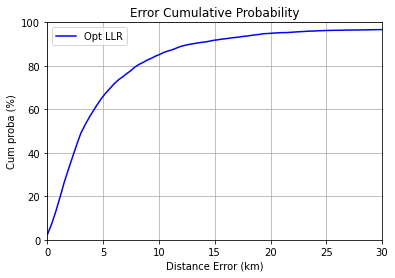

In [73]:
reg = linear_model.LinearRegression()

# Cross validation
y_pred_lng = cross_val_predict(reg, df_feat2_filter, ground_truth_lng_filter, cv=logo.get_n_splits(groups=dev_id))
y_pred_lat = cross_val_predict(reg, df_feat2_filter, ground_truth_lat_filter, cv=logo.get_n_splits(groups=dev_id))

err_vec = Eval_geoloc(ground_truth_lat_filter , ground_truth_lng_filter, y_pred_lat, y_pred_lng)

# Plot error distribution

values, base = np.histogram(err_vec, bins=50000)
cumulative = np.cumsum(values)
plt.figure()
plt.plot(base[:-1], cumulative / np.float(np.sum(values))  * 100.0, c='blue')
plt.grid()
plt.xlabel('Distance Error (km)'); plt.ylabel('Cum proba (%)'); plt.axis([0, 30, 0, 100])
plt.title('Error Cumulative Probability'); plt.legend( ["Opt LLR", "LLR 95", "LLR 99"])

# Error criterion
print(np.percentile(err_vec, 80))

In [74]:
# with RF

In [75]:
from sklearn.ensemble import RandomForestRegressor

3.738920000000001


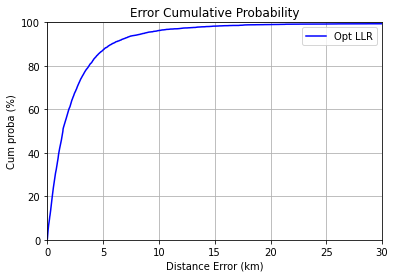

In [76]:
reg = RandomForestRegressor()

# Cross validation
y_pred_lng = cross_val_predict(reg, df_feat_filter, ground_truth_lng_filter, cv=10)
y_pred_lat = cross_val_predict(reg, df_feat_filter, ground_truth_lat_filter, cv=10)

err_vec = Eval_geoloc(ground_truth_lat_filter , ground_truth_lng_filter, y_pred_lat, y_pred_lng)

# Plot error distribution

values, base = np.histogram(err_vec, bins=50000)
cumulative = np.cumsum(values)
plt.figure()
plt.plot(base[:-1], cumulative / np.float(np.sum(values))  * 100.0, c='blue')
plt.grid()
plt.xlabel('Distance Error (km)'); plt.ylabel('Cum proba (%)'); plt.axis([0, 30, 0, 100])
plt.title('Error Cumulative Probability'); plt.legend( ["Opt LLR", "LLR 95", "LLR 99"])

# Error criterion
print(np.percentile(err_vec, 80))

In [ ]:
# with rssi

3.805209600000003


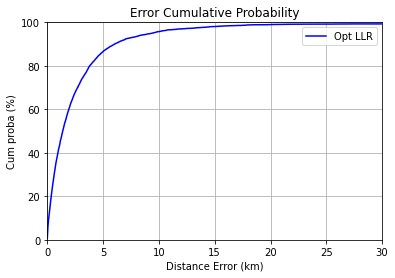

In [77]:
reg = RandomForestRegressor()

# Cross validation
y_pred_lng = cross_val_predict(reg, df_feat2_filter, ground_truth_lng_filter, cv=10)
y_pred_lat = cross_val_predict(reg, df_feat2_filter, ground_truth_lat_filter, cv=10)

err_vec = Eval_geoloc(ground_truth_lat_filter , ground_truth_lng_filter, y_pred_lat, y_pred_lng)

# Plot error distribution

values, base = np.histogram(err_vec, bins=50000)
cumulative = np.cumsum(values)
plt.figure()
plt.plot(base[:-1], cumulative / np.float(np.sum(values))  * 100.0, c='blue')
plt.grid()
plt.xlabel('Distance Error (km)'); plt.ylabel('Cum proba (%)'); plt.axis([0, 30, 0, 100])
plt.title('Error Cumulative Probability'); plt.legend( ["Opt LLR", "LLR 95", "LLR 99"])

# Error criterion
print(np.percentile(err_vec, 80))

In [25]:
# Construct test prediction

In [44]:
df_mess_test.head()

messid  bsid       did  nseq   rssi       time_ux  \
0  573be2503e952e191262c351  3578  116539.0   2.0 -111.0  1.463542e+12   
1  573c05f83e952e1912758013  2617  472504.0   0.0 -136.0  1.463551e+12   
2  573c05f83e952e1912758013  3556  472504.0   0.0 -127.0  1.463551e+12   
3  573c05f83e952e1912758013  3578  472504.0   0.0 -129.0  1.463551e+12   
4  573c05f83e952e1912758013  4058  472504.0   0.0 -105.0  1.463551e+12   

      bs_lat      bs_lng  
0  39.728651 -105.163032  
1  39.779908 -105.062479  
2  39.780658 -105.053676  
3  39.728651 -105.163032  
4  39.783211 -105.088747

In [78]:
df_feat, id_list_train = feat_mat_const(df_mess_train, listOfBs)

In [83]:
ground_truth_lat, ground_truth_lng = ground_truth_const(df_mess_train, pos_train)
ground_truth_lat.shape

(6068,)

In [84]:
df_feat_test, id_list_test = feat_mat_const(df_mess_test, listOfBs)

In [85]:
y_pred_lat, y_pred_lng = regressor_and_predict(df_feat, ground_truth_lat, ground_truth_lng, df_feat_test)

In [86]:
test_res = pd.DataFrame(np.array([y_pred_lat, y_pred_lng]).T, columns = ['lat', 'lng'])
test_res['messid'] = id_list_test

In [87]:
test_res.to_csv('pred_pos_test_list.csv', index=False)

In [88]:
test_res.head()

lat         lng                    messid
0  39.772912 -105.049629  573be2503e952e191262c351
1  39.774800 -105.062448  573c05f83e952e1912758013
2  39.678750 -105.012794  573c0796f0fe6e735a66deb3
3  39.773684 -105.037449  573c08d2864fce1a9a0563bc
4  39.678750 -105.012794  573c08ff864fce1a9a0579b0